In [ ]:
import pandas as pd
file_paths = ['/content/drive/MyDrive/archive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Friday-WorkingHours-Morning.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Monday-WorkingHours.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Tuesday-WorkingHours.pcap_ISCX.csv',
              '/content/drive/MyDrive/archive/Wednesday-workingHours.pcap_ISCX.csv'
              ]
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path, encoding='latin-1')
    dfs.append(df)

merged_dataset = pd.concat(dfs)
print(merged_dataset.shape)

output_path = '/content/drive/MyDrive/archive/merged_dst.csv'  # Specify your desired output path
merged_dataset.to_csv(output_path, index=False)
print(f"Merged dataset saved to: {output_path}")

(2830743, 79)
Merged dataset saved to: /content/drive/MyDrive/archive/merged_dst.csv


In [ ]:
import pandas as pd

# Assuming `file_path` points to your dataset CSV file
file_path = '/content/drive/MyDrive/archive/merged_dst.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Define the label column
label_column = ' Label'  # Replace with the actual label column name if different

# Convert labels to binary if not already done (Bot -> 1, Benign -> 0)
data[label_column] = data[label_column].apply(lambda x: 1 if x == 'Bot' else 0)

# Check label distribution
label_counts = data[label_column].value_counts()
label_percentage = data[label_column].value_counts(normalize=True) * 100

# Print results
print("Label Distribution (Counts):")
print(label_counts)
print("\nLabel Distribution (Percentage):")
print(label_percentage)


Label Distribution (Counts):
 Label
0    2828777
1       1966
Name: count, dtype: int64

Label Distribution (Percentage):
 Label
0    99.930548
1     0.069452
Name: proportion, dtype: float64


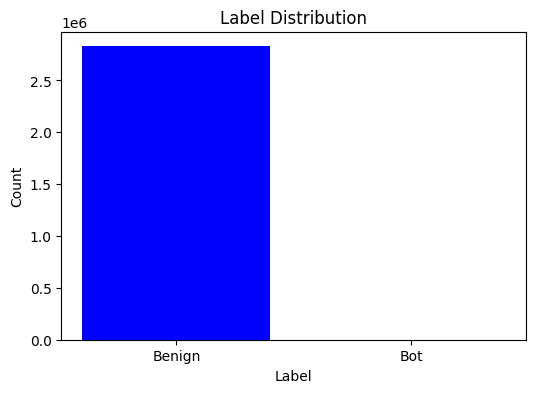

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


15470/15470 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.9824 - loss: 0.0567 - val_accuracy: 0.9815 - val_loss: 0.0562 - learning_rate: 0.0010
Epoch 2/100
15470/15470 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9889 - loss: 0.0405 - val_accuracy: 0.9847 - val_loss: 0.0459 - learning_rate: 0.0010
Epoch 3/100
15470/15470 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9910 - loss: 0.0357 - val_accuracy: 0.9838 - val_loss: 0.0551 - learning_rate: 0.0010
Epoch 4/100
15470/15470 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9918 - loss: 0.0331 - val_accuracy: 0.9887 - val_loss: 0.0333 - learning_rate: 0.0010
Epoch 5/100
15470/15470 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9924 - loss: 0.0312 - val_accuracy: 0.9879 - val_loss: 0.0364 - learning_rate: 0.0010
Epoch 6/100
15470/15470 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.9923 - loss: 0.0315 - val_accuracy: 0.9872 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 7/100
15470/15470 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accu

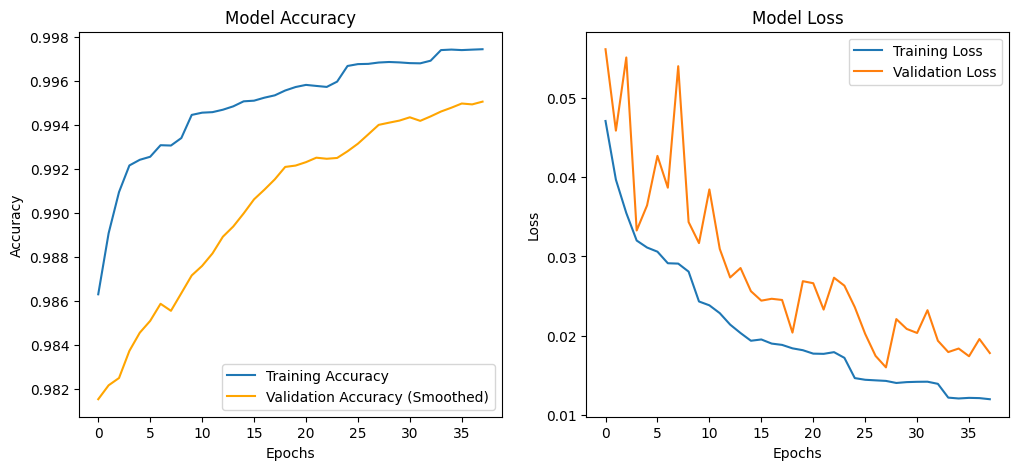

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


26539/26539 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step
Confusion Matrix:
[[844955   3678]
 [     8    582]]

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00    848633
         Bot       0.14      0.99      0.24       590

    accuracy                           1.00    849223
   macro avg       0.57      0.99      0.62    849223
weighted avg       1.00      1.00      1.00    849223



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, Add, Flatten, Reshape
)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

# Step 1: Load and preprocess data (unchanged)
def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    label_column = ' Label'
    if label_column not in data.columns:
        raise KeyError(f"The specified label column '{label_column}' is missing in the dataset.")
    data[label_column] = data[label_column].apply(lambda x: 1 if x.strip() == 'Bot' else 0)
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data.fillna(data.mean(), inplace=True)
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    data = data[numeric_cols]
    X = data.drop(columns=[label_column])
    y = data[label_column]
    return X, y

# Step 2: Plot label distribution (unchanged)
def plot_label_distribution(y):
    label_counts = y.value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
    plt.xticks(ticks=[0, 1], labels=["Benign", "Bot"])
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.title("Label Distribution")
    plt.show()

# Step 3: Split data into training, validation, and test sets (unchanged)
def split_data(X, y):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Step 4: Balance the training data using SMOTE (unchanged)
def balance_training_data(X_train, y_train):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    return X_train_smote, y_train_smote

# Step 5: Build Transformer-based model (unchanged)
def build_transformer_model(input_dim, num_heads=4, key_dim=64, dense_units=128, dropout_rate=0.3):
    inputs = Input(shape=(input_dim,))
    reshaped_inputs = Reshape((1, input_dim))(inputs)
    x = Dense(dense_units, activation='relu')(reshaped_inputs)
    x = Dropout(dropout_rate)(x)
    norm1 = LayerNormalization()(x)
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(norm1, norm1)
    attn_output = Add()([x, attn_output])
    norm2 = LayerNormalization()(attn_output)
    dense_output = Dense(dense_units, activation='relu')(norm2)
    dense_output = Add()([attn_output, dense_output])
    flatten_output = Flatten()(dense_output)
    x = Dense(dense_units // 2, activation='relu')(flatten_output)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 6: Train the model with class weighting and learning rate scheduler
def train_model(model, X_train, y_train, X_val, y_val, class_weights):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=128,  # Increased batch size
        class_weight=class_weights,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history

# Step 7: Smooth and plot training metrics
def smooth_curve(values, smoothing_factor=0.8):
    smoothed_values = []
    for i, val in enumerate(values):
        if i == 0:
            smoothed_values.append(val)
        else:
            smoothed_values.append(smoothing_factor * smoothed_values[-1] + (1 - smoothing_factor) * val)
    return smoothed_values

def plot_training_metrics(history):
    plt.figure(figsize=(12, 5))

    # Smooth accuracy
    smoothed_val_accuracy = smooth_curve(history.history['val_accuracy'])

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(smoothed_val_accuracy, label='Validation Accuracy (Smoothed)', color='orange')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Main Script
if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/archive/merged_dst.csv'
    X, y = load_and_preprocess_data(file_path)
    plot_label_distribution(y)
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    X_train, y_train = balance_training_data(X_train, y_train)
    class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))
    model = build_transformer_model(input_dim=X_train.shape[1])
    history = train_model(model, X_train, y_train, X_val, y_val, class_weights)
    plot_training_metrics(history)


    # Step 8: Generate predictions and print confusion matrix
    y_pred = model.predict(X_test)  # Predict probabilities
    y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions
    cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Optionally print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=["Benign", "Bot"]))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
